# Visualization of the error indicator

The error indicator $e_u$ is the key for the detection of the elements that we most likely want to update. For this purpose, we use the 'pg_rand' class. We visualize the perturbations and compare the resulting error indicators. 

In [1]:
import os
import sys
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from visualize import drawCoefficient

from gridlod import interp, coef, util, fem, world, linalg
from gridlod.world import World
import femsolverCoarse
import pg_rand
import buildcoef2d

## Plot function

The 'pg_rand' class contains the 'updateCorrectors' function. Clearly, this function that computes the error indicator needs to have access to the perturbed coefficient and the right hand side. The original coefficient is already included in the class. Setting the variable 'Computing' to be 'False' omits the computation of the new correctors because we are only interested in the error indicator itself. The first output variable 'vis' gives the number of elements that need to be updated according to the tolerance that we pick. Obviously, this is of no interest in case we just want to know the error indicator.     

In [2]:
def result(pglod, world, A, R, f, k, String):
    print "------------------ " + String + " ------------------------" 
    NWorldFine = world.NWorldFine
    NWorldCoarse = world.NWorldCoarse
    NCoarseElement = world.NCoarseElement
    
    boundaryConditions = world.boundaryConditions
    NpFine = np.prod(NWorldFine+1)
    NpCoarse = np.prod(NWorldCoarse+1)
        
    #new Coefficient
    ANew = R.flatten()
    Anew = coef.coefficientFine(NWorldCoarse, NCoarseElement, ANew)
    
    # tolerance = 0
    vis, eps = pglod.updateCorrectors(Anew, 0, f, 1, Computing = False)
    
    elemente = np.arange(np.prod(NWorldCoarse))
    
    plt.figure("Error indicators")
    plt.plot(elemente,eps,label=String)
    plt.ylabel('$e_{u,T}$')
    plt.xlabel('Element')
    plt.subplots_adjust(left=0.09,bottom=0.09,right=0.99,top=0.95,wspace=0.2,hspace=0.2)
    plt.legend(loc='upper right') #Legende
    plt.grid()

In [3]:
bg = 0.05       #background
val = 1         #values

#fine World
NWorldFine = np.array([256, 256])
NpFine = np.prod(NWorldFine+1)                                                                               

#coarse World
NWorldCoarse = np.array([16,16])
NpCoarse = np.prod(NWorldCoarse+1)

#ratio between Fine and Coarse
NCoarseElement = NWorldFine/NWorldCoarse

boundaryConditions = np.array([[0, 0],
                               [0, 0]])

world = World(NWorldCoarse, NCoarseElement, boundaryConditions)

#righthandside
f = np.ones(NpCoarse)

## Coefficient

<IPython.core.display.Javascript object>


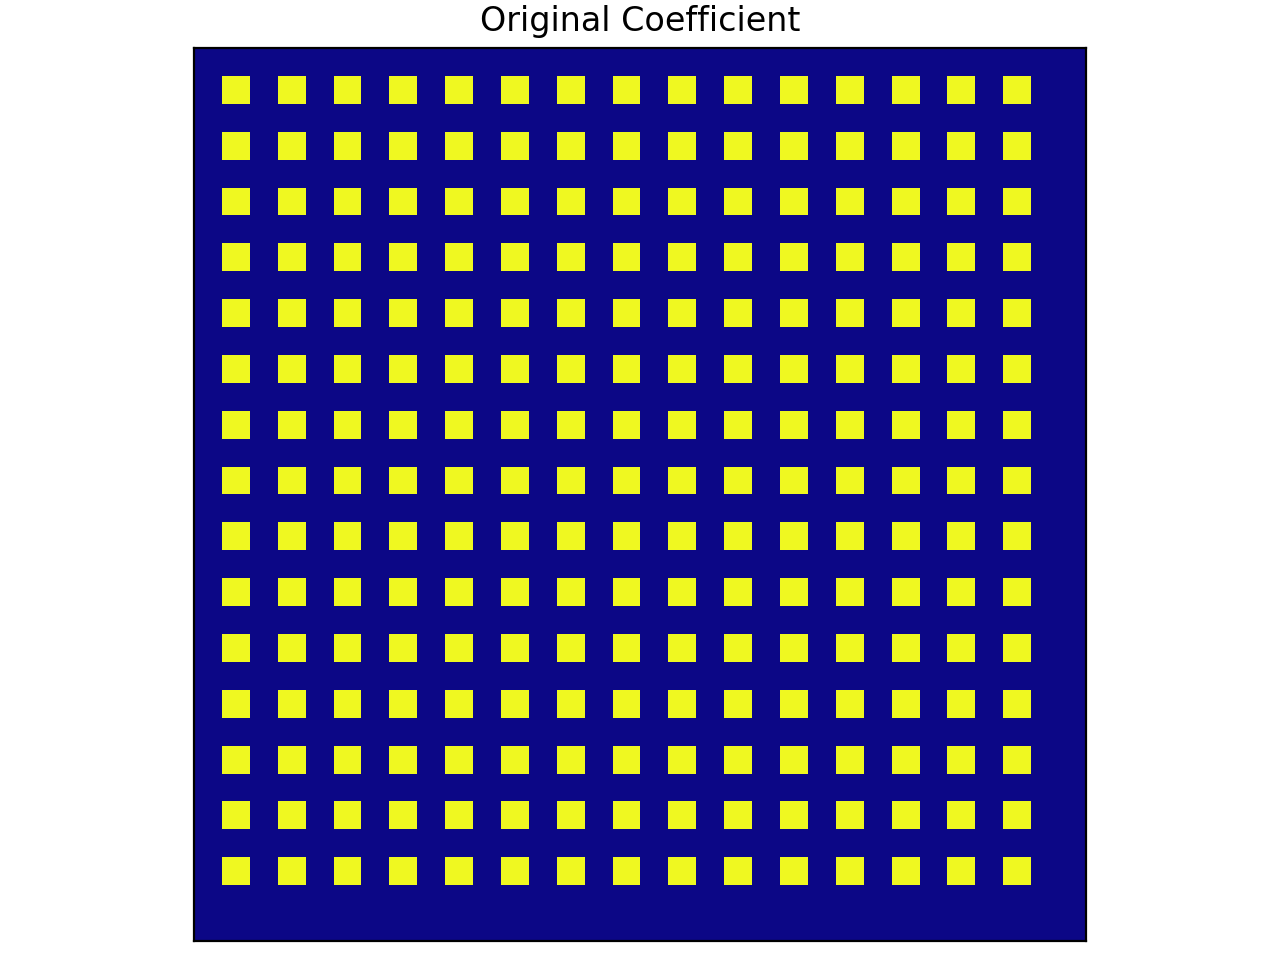

In [4]:
CoefClass = buildcoef2d.Coefficient2d(NWorldFine, 
                                    bg                  = 0.05, 
                                    val                 = 1, 
                                    length              = 8, 
                                    thick               = 8, 
                                    space               = 8, 
                                    probfactor          = 1, 
                                    right               = 1, 
                                    down                = 0, 
                                    diagr1              = 0, 
                                    diagr2              = 0, 
                                    diagl1              = 0, 
                                    diagl2              = 0, 
                                    LenSwitch           = None, 
                                    thickSwitch         = None, 
                                    equidistant         = True, 
                                    ChannelHorizontal   = None, 
                                    ChannelVertical     = None,
                                    BoundarySpace       = True)


A = CoefClass.BuildCoefficient()
ABase = A.flatten()
 
plt.figure("Original Coefficient")
drawCoefficient(NWorldFine, ABase)
plt.title("Original Coefficient")
plt.show()

## Perturbations

### Change in value to 3

<IPython.core.display.Javascript object>


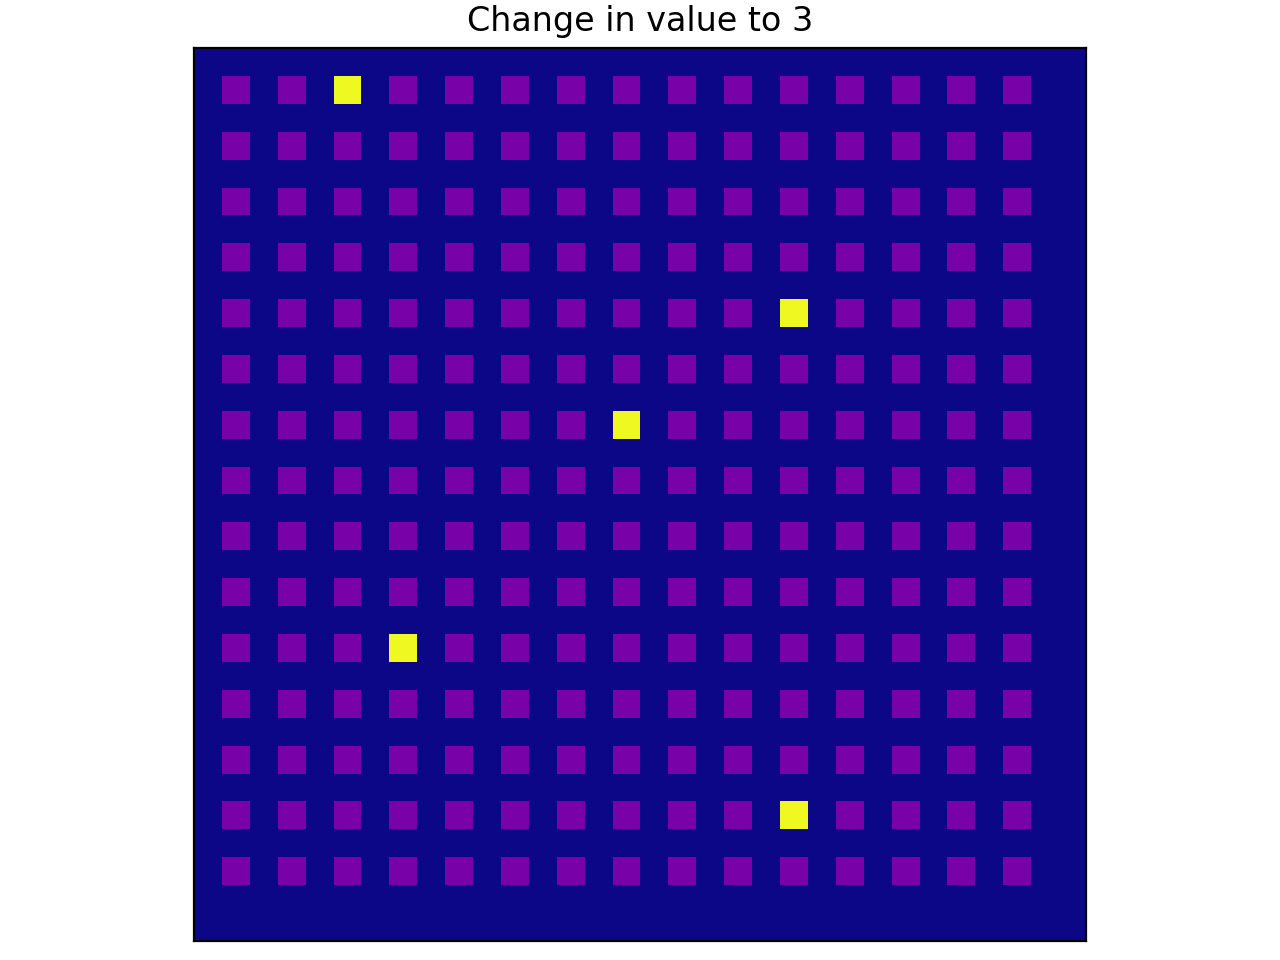

In [5]:
numbers = [2,70,97,153,205]

value1 = 3
R1 = CoefClass.SpecificValueChange( ratio               = value1,
                                    Number              = numbers,
                                    probfactor          = 1,
                                    randomvalue         = None,
                                    negative            = None,
                                    ShapeRestriction    = True,
                                    ShapeWave           = None,
                                    Original            = True)

plt.figure("Change in value to 3")
drawCoefficient(NWorldFine, R1)
plt.title("Change in value to 3")
plt.show()

### Change in value to 50

<IPython.core.display.Javascript object>


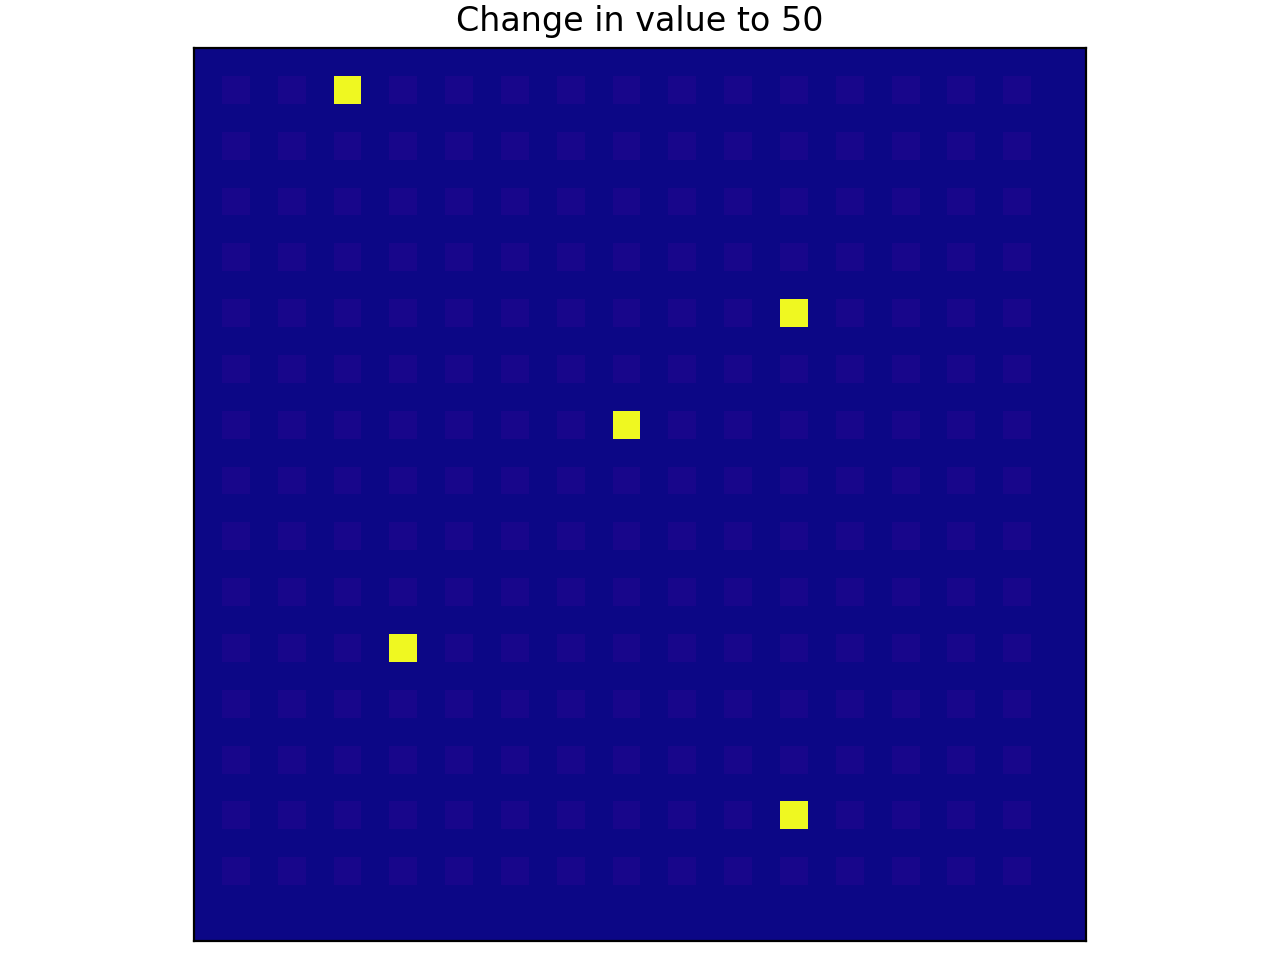

In [6]:
value2 = 50
R2 = CoefClass.SpecificValueChange( ratio               = value2,
                                    Number              = numbers,
                                    probfactor          = 1,
                                    randomvalue         = None,
                                    negative            = None,
                                    ShapeRestriction    = True,
                                    ShapeWave           = None,
                                    Original            = True)

plt.figure("Change in value to 50")
drawCoefficient(NWorldFine, R2)
plt.title("Change in value to 50")
plt.show()

### Disappearance

<IPython.core.display.Javascript object>


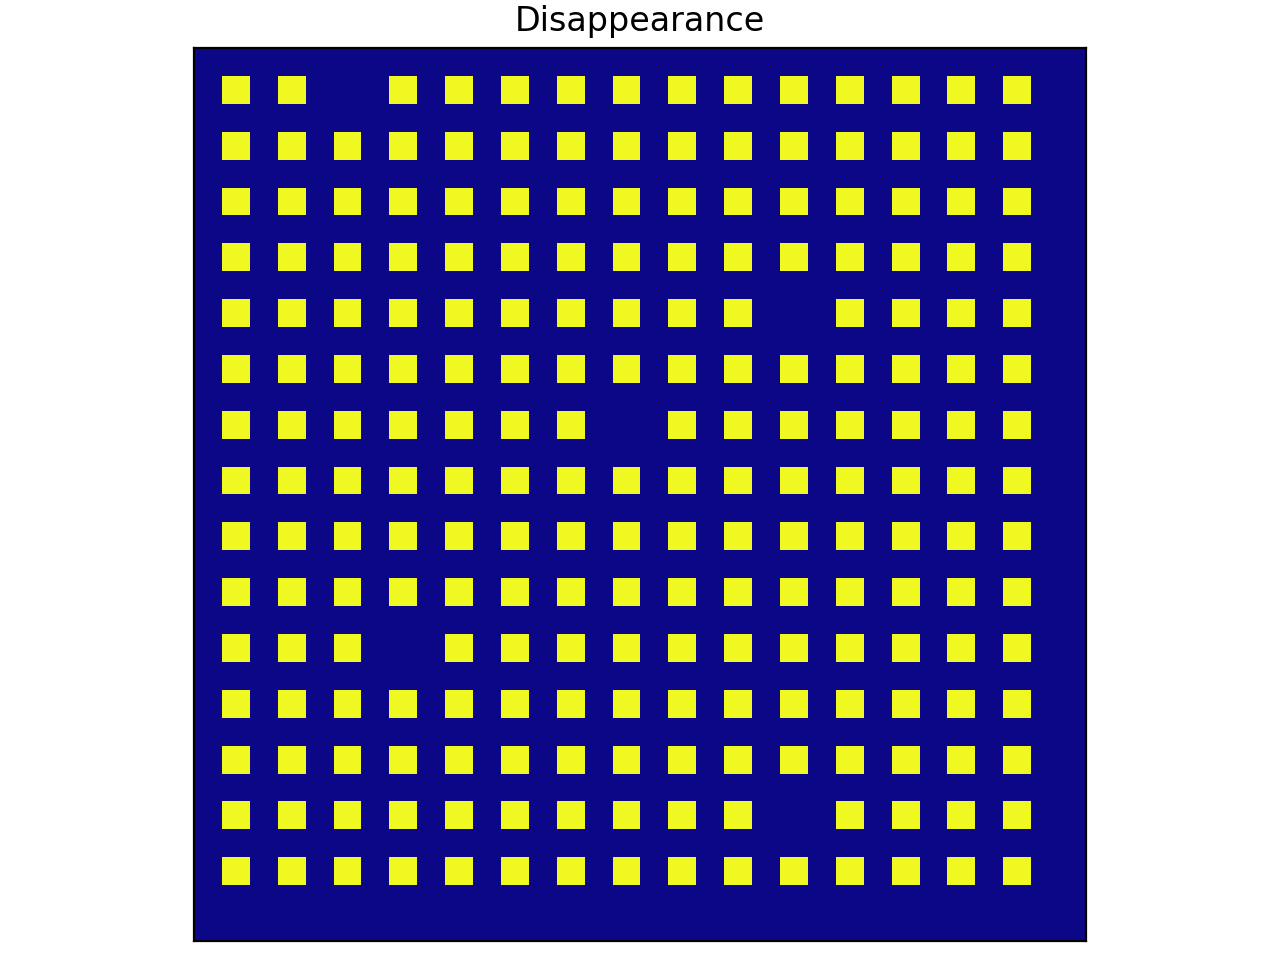

In [7]:
D = CoefClass.SpecificVanish(       Number              = numbers,
                                    probfactor          = 1,
                                    PartlyVanish        = None,
                                    Original            = True)
                                    
plt.figure("Disappearance")
drawCoefficient(NWorldFine, D)
plt.title("Disappearance")
plt.show()

### Shift one step

<IPython.core.display.Javascript object>


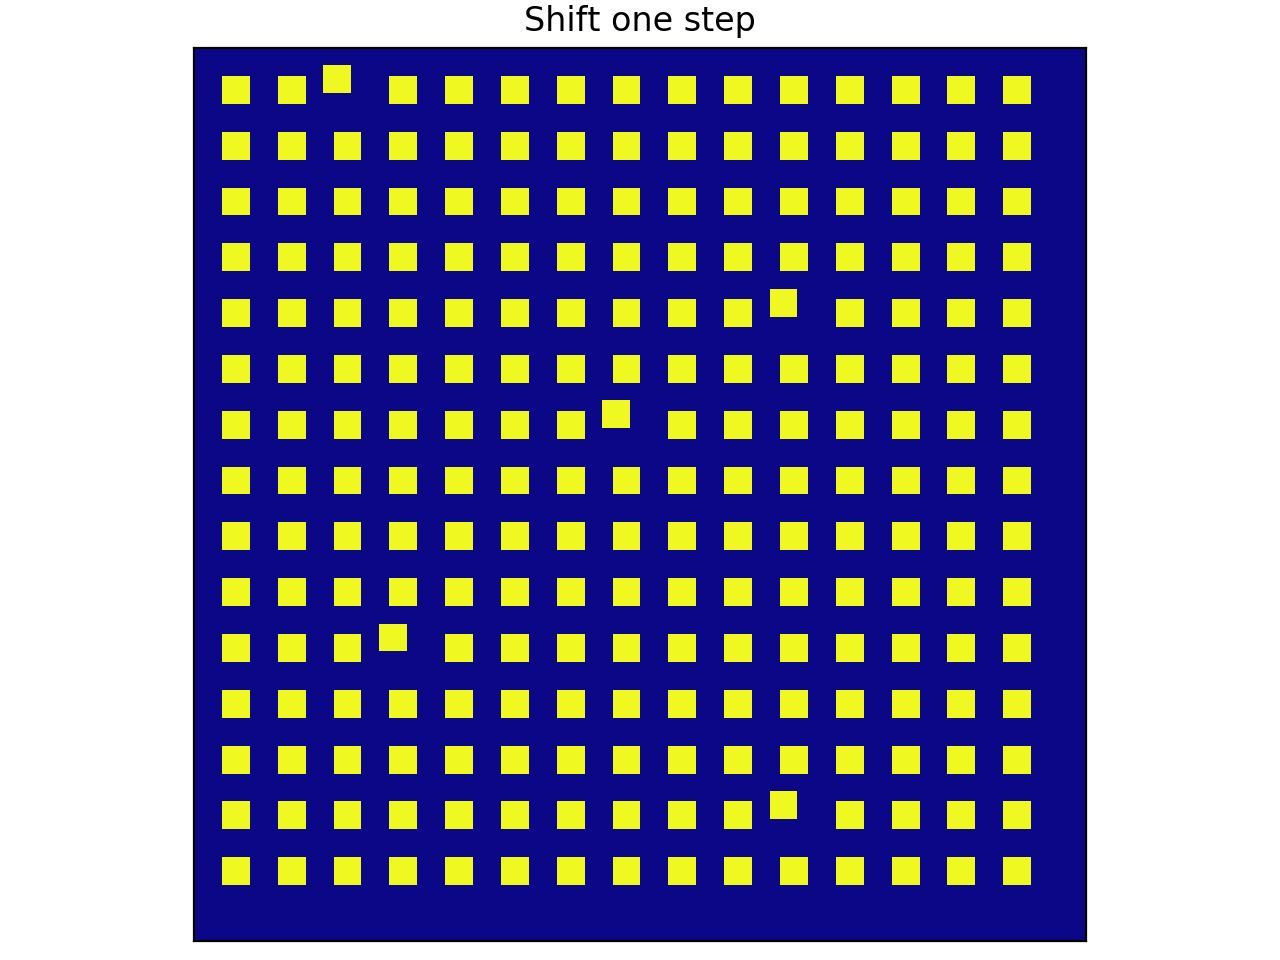

In [8]:
E2 = CoefClass.SpecificMove(        Number              = numbers,
                                    steps               = 3,
                                    randomstep          = None,
                                    randomDirection     = None,
                                    Right               = 0,
                                    BottomRight         = 0,
                                    Bottom              = 0,
                                    BottomLeft          = 0,
                                    Left                = 0,
                                    TopLeft             = 1,
                                    Top                 = 0,
                                    TopRight            = 0,
                                    Original            = True)

plt.figure("Shift one step")
drawCoefficient(NWorldFine, E2)
plt.title("Shift one step")
plt.show()

### Shift two steps

<IPython.core.display.Javascript object>


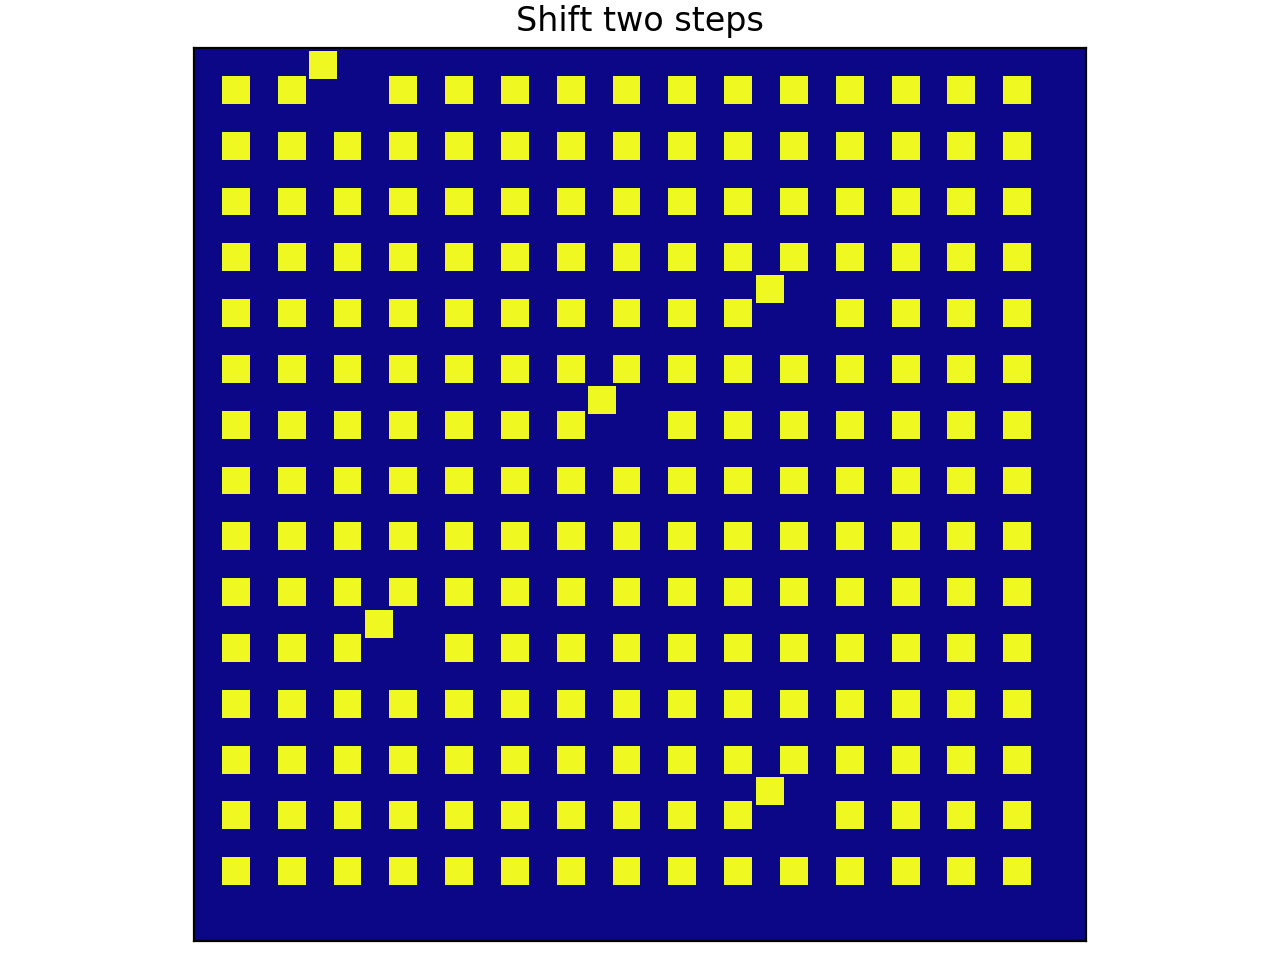

In [9]:
E3 = CoefClass.SpecificMove(        Number              = numbers,
                                    steps               = 7,
                                    randomstep          = None,
                                    randomDirection     = None,
                                    Right               = 0,
                                    BottomRight         = 0,
                                    Bottom              = 0,
                                    BottomLeft          = 0,
                                    Left                = 0,
                                    TopLeft             = 1,
                                    Top                 = 0,
                                    TopRight            = 0,
                                    Original            = True)

plt.figure("Shift two steps")
drawCoefficient(NWorldFine, E3)
plt.title("Shift two steps")
plt.show()

## Precomputations

The 'pg_rand' class clearly needs the main ingeredients of the PG-LOD that is the interpolation, the mesh, the coefficient as well as the patch size. Computing the original corrections stores them in the class. In fact, we need to compute them just once. 

In [10]:
NWorldFine = world.NWorldFine
NWorldCoarse = world.NWorldCoarse
NCoarseElement = world.NCoarseElement

boundaryConditions = world.boundaryConditions
NpFine = np.prod(NWorldFine+1)
NpCoarse = np.prod(NWorldCoarse+1)

#interpolant
IPatchGenerator = lambda i, N: interp.L2ProjectionPatchMatrix(i, N, NWorldCoarse, NCoarseElement, boundaryConditions)

#old Coefficient
Aold = coef.coefficientFine(NWorldCoarse, NCoarseElement, ABase)

k = 5

pglod = pg_rand.VcPetrovGalerkinLOD(Aold, world, k, IPatchGenerator, 0)
pglod.originCorrectors(clearFineQuantities=False)

## Results

The result function compute the error indicator and plots the result. 

------------------ Change in value to 3 ------------------------
Not Recomputed!


<IPython.core.display.Javascript object>


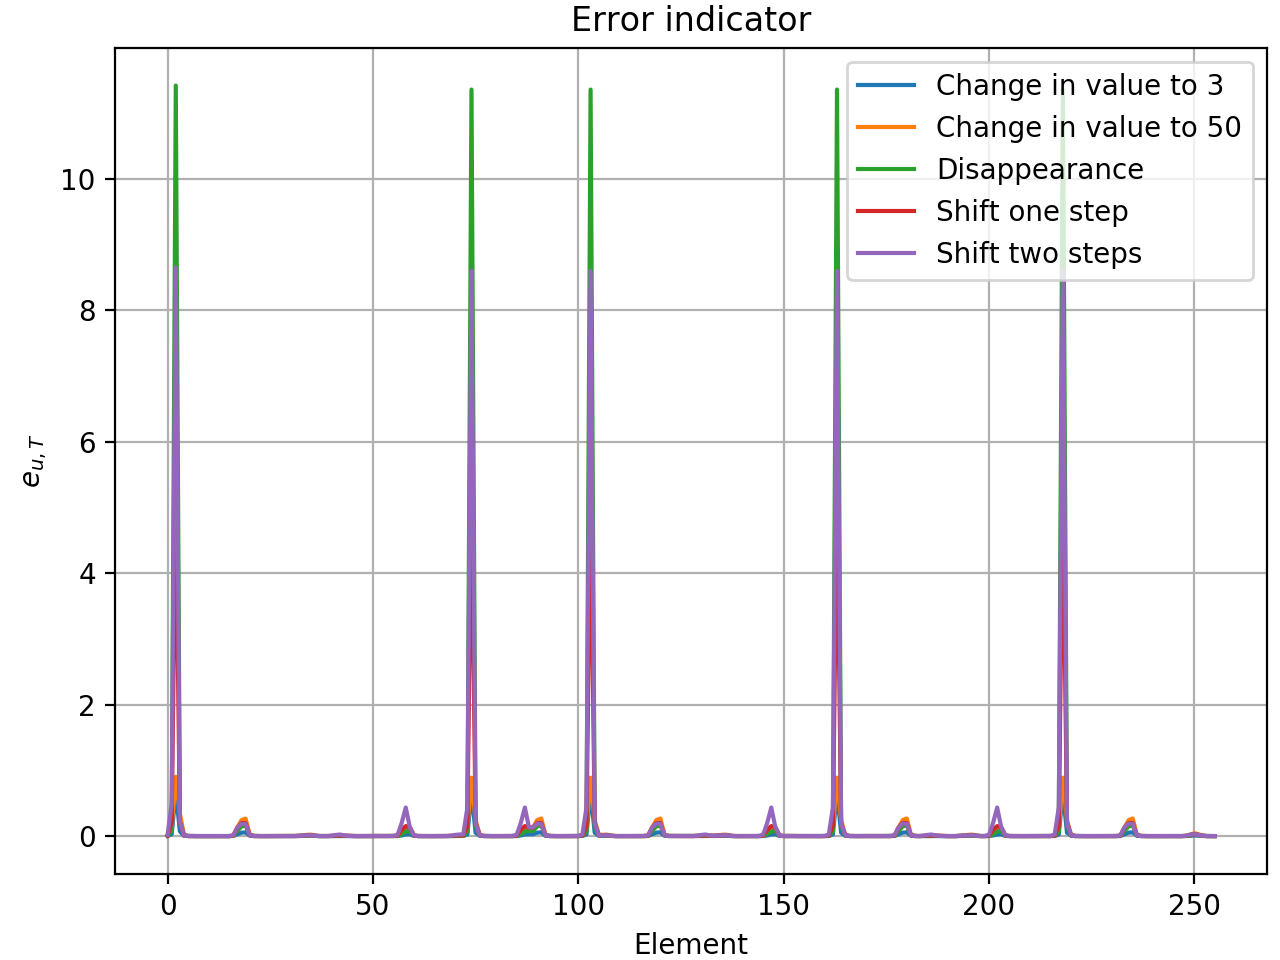

------------------ Change in value to 50 ------------------------
Not Recomputed!
------------------ Disappearance ------------------------
Not Recomputed!
------------------ Shift one step ------------------------
Not Recomputed!
------------------ Shift two steps ------------------------
Not Recomputed!


In [11]:
# Change in value 1
result(pglod ,world, A, R1, f, k, 'Change in value to ' + str(value1))

# Change in value 2 
result(pglod ,world, A, R2, f, k, 'Change in value to ' + str(value2))

# Disappearance 
result(pglod, world, A, D, f, k, 'Disappearance')

# Shift one step
result(pglod, world, A, E2, f, k, 'Shift one step')

# Shift two steps
result(pglod, world, A, E3, f, k, 'Shift two steps')
plt.title('Error indicator')
plt.show()